# KELT-1b eclipse - visit 1

In [16]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [17]:
rc('figure', figsize=(13,4))

In [18]:
from src.kelt1 import read_data, EclipseLPF

## Initialise the LPF

In [19]:
visit = 1

In [20]:
time, flux, cov = read_data(visit)
lpf = EclipseLPF('kelt-1', 'cheops', time, flux, covariates=cov, tref=floor(time[0][0]))
lpf.print_parameters(1)

  0 |G| tc             N(μ = 2458764.31647, σ = 0.00018)        [    -inf ..      inf]
  1 |G| p              N(μ = 1.2174928, σ = 1.7e-06)            [    0.00 ..      inf]
  2 |G| rho            N(μ = 0.58, σ = 0.05)                    [    0.00 ..      inf]
  3 |G| b              N(μ = 0.195, σ = 0.05)                   [    0.00 ..     1.00]
  4 |G| secw           N(μ = 0.0, σ = 0.0001)                   [   -1.00 ..     1.00]
  5 |G| sesw           N(μ = 0.0, σ = 0.0001)                   [   -1.00 ..     1.00]
  6 |P| k2             N(μ = 0.005935, σ = 4.468e-05)           [    0.00 ..      inf]
  7 |P| fr_cheops      U(a = 0.0, b = 0.2)                      [    0.00 ..     1.00]
  8 |L| wn_loge_0      U(a = -4, b = 0)                         [    -inf ..      inf]
  9 |L| lm_i__0        N(μ = 1.0, σ = 0.0006666551846110111)    [    -inf ..      inf]
 10 |L| lm_s__0_1      N(μ = 0.0, σ = 0.0006666551846110111)    [    -inf ..      inf]
 11 |L| lm_s__0_2      N(μ = 0.0, σ = 0.000

## Find the global posterior mode

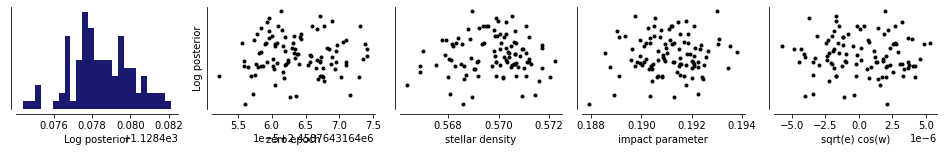

In [21]:
lpf.optimize_global(1500, npop=100)

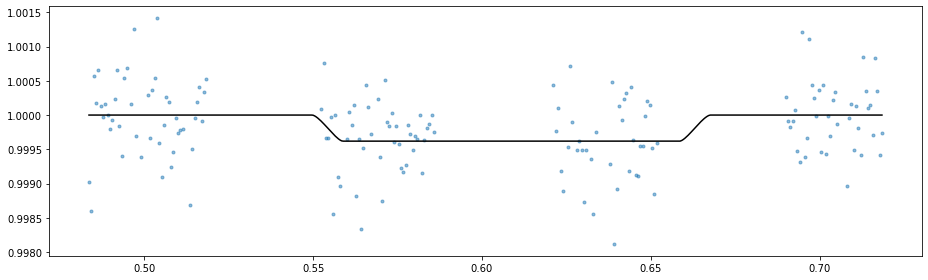

In [22]:
lpf.plot_folded_eclipse_model();

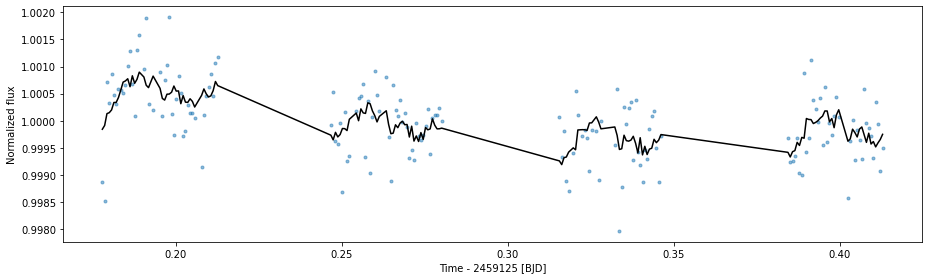

In [23]:
lpf.plot_flux_model();

## Sample the posterior using MCMC

In [27]:
lpf.sample_mcmc(500, 20, repeats=5)

In [28]:
lpf.sample_mcmc(5000, 20, repeats=1)

552.0010849947018


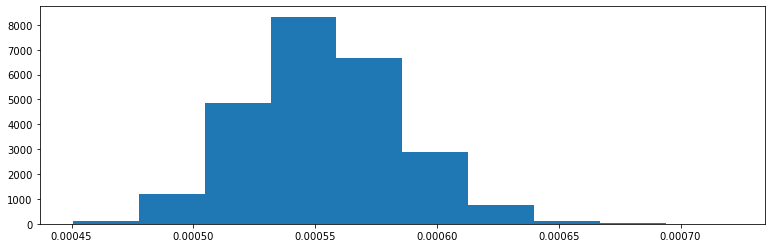

In [35]:
df = lpf.posterior_samples(derived_parameters=False)
wn = 10**(df.wn_loge_0)
print(1e6*median(wn))
hist(wn);

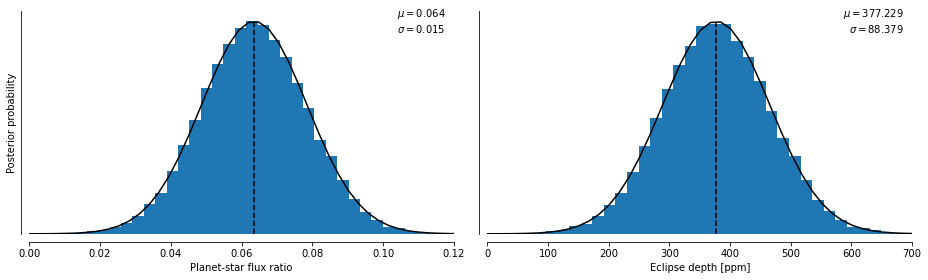

In [32]:
fig = lpf.plot_posteriors(truncate=False, nsamples=300);
fig.savefig('kelt_1_v1_posteriors.pdf')

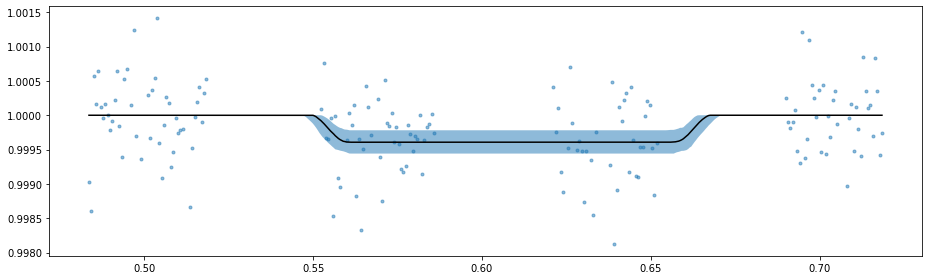

In [33]:
fig = lpf.plot_folded_eclipse_model('mcmc')
fig.savefig('kelt_1_v1_model_posterior.pdf')

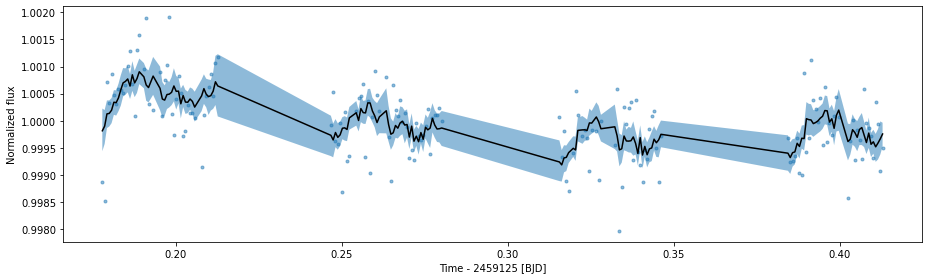

In [34]:
fig = lpf.plot_flux_model('mcmc')
fig.savefig('kelt_1_v1_model_and_systematics.pdf')

---

<center>&copy;2020 Hannu Parviainen</center>